In [ ]:
!wget https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip
!wget https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip

--2021-06-18 09:02:07--  https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.204.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.204.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68553005 (65M) [application/zip]
Saving to: ‘vehicles.zip’

vehicles.zip        100%[===================>]  65.38M  65.6MB/s    in 1.0s    

2021-06-18 09:02:08 (65.6 MB/s) - ‘vehicles.zip’ saved [68553005/68553005]

--2021-06-18 09:02:08--  https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.204.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.204.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57599296 (55M) [application/zip]
Saving to: ‘non-vehicles.zip’

non-vehicles.zip    100%[===================>]  54.93M  50.8MB/s    in 1.1s    

2021-06-18 09:02:09 (50.8 MB/s) - ‘non-vehic

In [ ]:
!unzip vehicles.zip
!unzip non-vehicles.zip

Streaming output truncated to the last 5000 lines.
  inflating: non-vehicles/Extras/extra5158.png  
  inflating: non-vehicles/Extras/extra5159.png  
  inflating: non-vehicles/Extras/extra516.png  
  inflating: non-vehicles/Extras/extra5160.png  
  inflating: non-vehicles/Extras/extra5161.png  
  inflating: non-vehicles/Extras/extra5162.png  
  inflating: non-vehicles/Extras/extra5163.png  
  inflating: non-vehicles/Extras/extra5164.png  
  inflating: non-vehicles/Extras/extra5165.png  
  inflating: non-vehicles/Extras/extra5166.png  
  inflating: non-vehicles/Extras/extra5167.png  
  inflating: non-vehicles/Extras/extra5168.png  
  inflating: non-vehicles/Extras/extra5169.png  
  inflating: non-vehicles/Extras/extra517.png  
  inflating: non-vehicles/Extras/extra5170.png  
  inflating: non-vehicles/Extras/extra5171.png  
  inflating: non-vehicles/Extras/extra5172.png  
  inflating: non-vehicles/Extras/extra5173.png  
  inflating: non-vehicles/Extras/extra5174.png  
  inflating: non-veh

In [ ]:
from imutils.paths import list_images
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

In [ ]:
pos_img = list(list_images('vehicles'))
neg_img = list(list_images('non-vehicles'))

In [ ]:
hog??

In [ ]:
def calculate_hog_features(img,num_orient,num_cells_per_block,num_pixel_per_cell,visualise=False,feature_vector_flag=True,multichannel=True):
  
  if visualise:

    f,i = hog(img,num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=True,multichannel=multichannel)
    return f,i

  else :

    f = hog(img,num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=False,multichannel=multichannel)
    return f


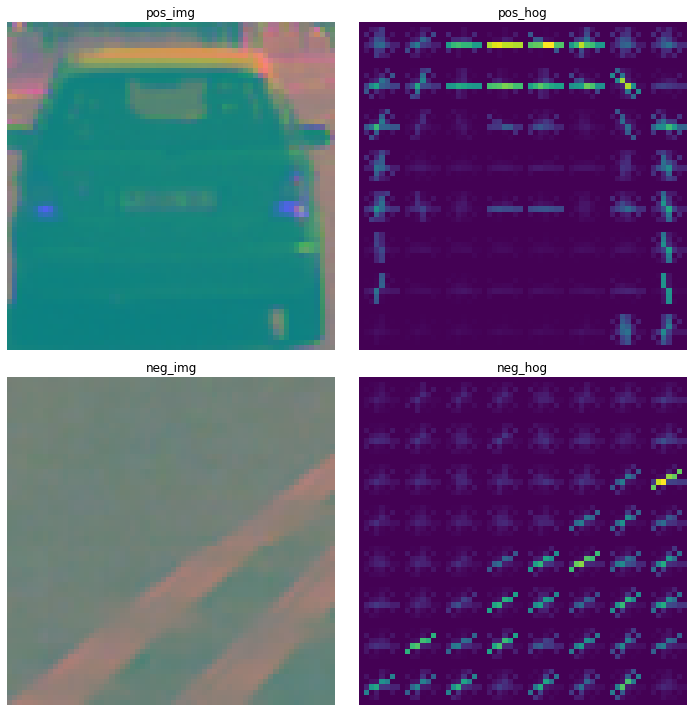

In [ ]:
x = random.randint(0,len(pos_img)-1)

test_pos = cv2.cvtColor(cv2.imread(pos_img[x]),cv2.COLOR_BGR2YUV)
test_neg = cv2.cvtColor(cv2.imread(neg_img[x]),cv2.COLOR_BGR2YUV)

_,i = calculate_hog_features(test_pos,9,(2,2),(8,8),True,True,True)
fig,axes = plt.subplots(2,2,figsize=(10,10))

axes = axes.flat

axes[0].imshow(test_pos)
axes[0].axis('off')
axes[0].set_title('pos_img')

axes[1].imshow(i)
axes[1].axis('off')
axes[1].set_title('pos_hog')


_,i = calculate_hog_features(test_neg,9,(2,2),(8,8),True,True,True)


axes[2].imshow(test_neg)
axes[2].axis('off')
axes[2].set_title('neg_img')


axes[3].imshow(i)
axes[3].axis('off')
axes[3].set_title('neg_hog')


fig.tight_layout()
fig.show()



In [ ]:
def generate_hog_for_dataset(img_paths,color_space,num_orient,num_cells_per_block,num_pixel_per_cell,visualise=False,feature_vector_flag=True,multi_channel=False):
  
  hogs = []
  t1 = datetime.now()

  for img in img_paths:
 
    img = cv2.cvtColor(cv2.imread(img),color_space)
    f1 = hog(img[:,:,0],num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=False,multichannel=False)
    f2 = hog(img[:,:,1],num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=False,multichannel=False)
    f3 = hog(img[:,:,2],num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=False,multichannel=False)
    
    hogs.append(np.hstack((f1,f2,f3)))
  
  print(f'Time Required : { datetime.now() - t1 }')
  
  return hogs



In [ ]:
pos_hogs = generate_hog_for_dataset(pos_img,cv2.COLOR_BGR2YUV,9,(2,2),(8,8),visualise=False,feature_vector_flag=True,multi_channel=True)

Time Required : 0:00:55.874541


In [ ]:
neg_hogs = generate_hog_for_dataset(neg_img,cv2.COLOR_BGR2YUV,9,(2,2),(8,8),visualise=False,feature_vector_flag=True,multi_channel=True)

Time Required : 0:00:54.953889


In [ ]:
pos_hogs[0].shape

(5292,)

In [ ]:
neg_hogs[0].shape

(5292,)

In [ ]:
X = np.vstack((pos_hogs,neg_hogs))

In [ ]:
Y = np.concatenate((np.ones(len(pos_hogs)),np.zeros(len(neg_hogs))))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = X.reshape(X.shape[0],-1)

In [ ]:
X.shape

(17760, 5292)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42,stratify=Y,shuffle=True)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf = LinearSVC()

In [ ]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print(f"Train Accuracy : {clf.score(X_train,Y_train)}")
print(f"Test Accuracy : {clf.score(X_test,Y_test)}")

Train Accuracy : 1.0
Test Accuracy : 0.9842342342342343


In [ ]:
def check_color_space():

  color_spaces = [
                  cv2.COLOR_BGR2HSV,
                  cv2.COLOR_BGR2YUV,
                  cv2.COLOR_BGR2YCrCb,
                  cv2.COLOR_BGR2RGB,
                  cv2.COLOR_BGR2HLS
  ]

  for cs in color_spaces:

    pos_hogs = generate_hog_for_dataset(pos_img,cs,9,(2,2),(8,8),visualise=False,feature_vector_flag=True,multi_channel=False)
    neg_hogs = generate_hog_for_dataset(neg_img,cs,9,(2,2),(8,8),visualise=False,feature_vector_flag=True,multi_channel=False)
    
    X = np.vstack((pos_hogs,neg_hogs))
    Y = np.concatenate((np.ones(len(pos_hogs)),np.zeros(len(neg_hogs))))

    X = X.reshape(X.shape[0],-1)

    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42,stratify=Y)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    clf = LinearSVC()
    clf.fit(X_train,Y_train)

    print(f"Train Accuracy : {clf.score(X_train,Y_train)}",end='  ')
    print(f"Test Accuracy : {clf.score(X_test,Y_test)}")








In [ ]:
# check_color_space()

In [ ]:
def get_windows(img,win_size=(64,64),overlap=(0.15,0.15),start_stop_x=None,start_stop_y=None):
  
    windows = []

    w = start_stop_x[1]-start_stop_x[0]
    h = start_stop_y[1]-start_stop_y[0]

    x_ = int ( (w-win_size[1]) / (win_size[1]*overlap[1]) ) + 1
    y_ = int ( (h-win_size[0]) / (win_size[0]*overlap[0]) ) + 1

    for y in range(0,y_):

      for x in range(0,x_):

        x0 = start_stop_x[0] + int ( x * win_size[1] * overlap[1])
        y0 = start_stop_y[0] + int ( y * win_size[0] * overlap[0])
        
        x1 = x0 + win_size[1]
        y1 = y0 + win_size[0]
        
        windows.append( ( (x1,y1), (x0,y0) ) )
    
    return windows

        



In [ ]:
!git clone https://github.com/udacity/CarND-Vehicle-Detection.git

Cloning into 'CarND-Vehicle-Detection'...
remote: Enumerating objects: 65, done.
remote: Total 65 (delta 0), reused 0 (delta 0), pack-reused 65
Unpacking objects: 100% (65/65), done.


In [ ]:
test_img = cv2.cvtColor(cv2.imread('test_images/test4.jpg'),cv2.COLOR_BGR2RGB)

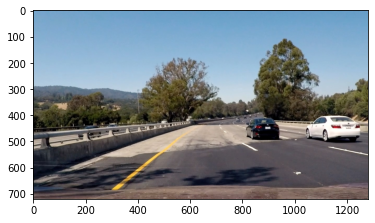

In [ ]:
plt.imshow(test_img)

In [ ]:
win1 = get_windows(test_img,start_stop_x=[0,1280],start_stop_y=[400,464])

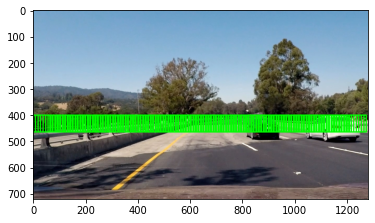

In [ ]:
i = test_img.copy()

for p1,p0 in win1:
  cv2.rectangle(i,p0,p1,(0,255,0),3)

plt.imshow(i)



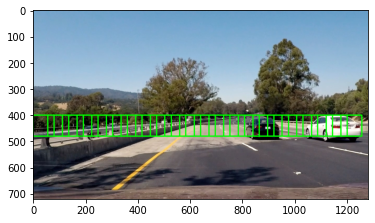

In [ ]:
win2 = get_windows(test_img,start_stop_x=[0,1280],start_stop_y=[400,480],win_size=(80,80),overlap=(0.7,0.7))

i = test_img.copy()

for p1,p0 in win2:
  cv2.rectangle(i,p0,p1,(0,255,0),3)

plt.imshow(i)

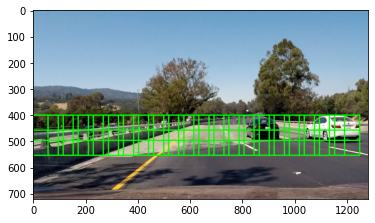

In [ ]:
win3 = get_windows(test_img,start_stop_x=[0,1280],start_stop_y=[400,592],win_size=(96,96),overlap=(0.6,0.6))

i = test_img.copy()

for p1,p0 in win3:
  cv2.rectangle(i,p0,p1,(0,255,0),3)

plt.imshow(i)

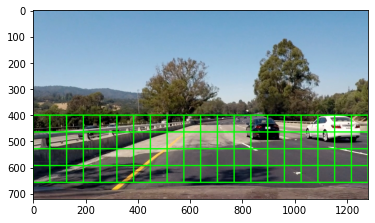

In [ ]:
win3 = get_windows(test_img,start_stop_x=[0,1280],start_stop_y=[400,660],win_size=(128,128),overlap=(0.5,0.5))

i = test_img.copy()

for p1,p0 in win3:
  cv2.rectangle(i,p0,p1,(0,255,0),3)

plt.imshow(i)

In [ ]:
def generate_hog(img,color_space,num_orient,num_cells_per_block,num_pixel_per_cell,visualise=False,feature_vector_flag=True,multi_channel=False):
  
  img = cv2.cvtColor(img,color_space)
  f1 = hog(img[:,:,0],num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=False,multichannel=False)
  f2 = hog(img[:,:,1],num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=False,multichannel=False)
  f3 = hog(img[:,:,2],num_orient,num_pixel_per_cell,num_cells_per_block,feature_vector=feature_vector_flag,visualize=False,multichannel=False)
    
  return np.hstack((f1,f2,f3))

In [ ]:
def check_cars(img_p,clf):

  img = cv2.cvtColor(cv2.imread(img_p),cv2.COLOR_BGR2RGB)

  win1 = win1 = get_windows(img,start_stop_x=[0,1280],start_stop_y=[400,464])
  win2 = get_windows(img,start_stop_x=[0,1280],start_stop_y=[400,480],win_size=(80,80),overlap=(0.2,0.2))
  win3 = get_windows(img,start_stop_x=[0,1280],start_stop_y=[400,592],win_size=(96,96),overlap=(0.3,0.3))
  win4 = get_windows(img,start_stop_x=[0,1280],start_stop_y=[400,660],win_size=(128,128),overlap=(0.5,0.5))
  
  win = win1+win2+win3+win4

  ind = []
  bboxes = []

  for i,w in enumerate(win):
    x1 = w[0][0]
    y1 = w[0][1]

    x0 = w[1][0]
    y0 = w[1][1]

    x = cv2.resize(img[y0:y1,x0:x1],(64,64))
    
    x = generate_hog(x,cv2.COLOR_BGR2YUV,9,(2,2),(8,8),visualise=False,feature_vector_flag=True,multi_channel=False)
    x = x.reshape((1,-1))
    x = sc.transform(x)

    if clf.predict(x) == 1:
      ind.append(i)
  

  for i in ind:
    bboxes.append(win[i])
  
  return bboxes






In [ ]:
i = check_cars('test_images/test4.jpg',clf)

In [ ]:
def draw_bboxes(img,bboxes):

  img_c = img.copy()

  for p2,p1 in bboxes:
    cv2.rectangle(img_c,p1,p2,(0,255,0),3)
  
  return img_c

In [ ]:
def add_heat(bboxes,h,w):

  heat_map = np.zeros((h,w))

  for p2,p1 in bboxes:
    heat_map[p1[1]:p2[1],p1[0]:p2[0]] += 1
  
  return heat_map

In [ ]:
def apply_threshold(heat_map,threshold):

  return ( heat_map >= threshold ).astype('int')

In [ ]:
from scipy.ndimage.measurements import label

In [ ]:
def draw_bounding_box(img,labels):

  img_c = img.copy()

  for c in range(1,labels[1]+1):

    yy,xx = (labels[0] == c).nonzero()
    
    p1 = (np.min(xx),np.min(yy))
    p2 = (np.max(xx),np.max(yy))

    cv2.rectangle(img_c,p1,p2,(0,255,0),5)
  
  return img_c

In [ ]:
def final_car_check(img_p,model):

  img = cv2.cvtColor(cv2.imread(img_p),cv2.COLOR_BGR2RGB)
  bboxes = check_cars(img_p,model)
  heat_map = add_heat(bboxes,img.shape[0],img.shape[1])
  thresholded_heat_map = apply_threshold(heat_map,3)
  labelled = label(thresholded_heat_map)
  img = draw_bounding_box(img,labelled)

  return img

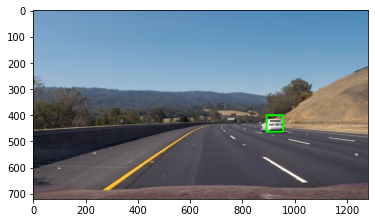

In [ ]:
plt.imshow(final_car_check('test_images/test3.jpg',clf))